In [10]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [11]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [12]:
monthfile='MERRA2_2016_inst1_2d_asm_Nx_M2I1NXASM_ctio_11.csv'
yearfile='MERRA2_2016_inst1_2d_asm_Nx_M2I1NXASM_ctio_AllYear.csv'

In [13]:
df_month=pd.read_csv(monthfile)

In [14]:
df_year=pd.read_csv(yearfile)

In [15]:
df_month.describe()

,PS,T10M,T2M,TO3,TOX,TQI,TQL,TS,U10M,U2M,U50M,V10M,V2M,V50M
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,78476.568381,288.297993,288.345246,277.328675,0.005952,0.003948,0.001200,290.383071,1.872660,1.634642,1.166681,-0.571482,-0.428235,-0.744118
std,117.839642,4.310530,5.761474,15.151748,0.000325,0.014095,0.005061,12.096428,3.287258,2.553214,2.638312,1.466403,1.161258,1.657827
min,78130.453125,279.059082,277.367615,249.441330,0.005347,0.000000,0.000000,271.221283,-2.979433,-1.882657,-3.213983,-5.863996,-4.666296,-6.625673
25%,78415.888672,285.064713,283.802689,265.693291,0.005701,0.000000,0.000000,279.286430,-1.237721,-0.769381,-1.382703,-1.057961,-0.726652,-1.376753
50%,78503.906250,288.262207,287.525848,277.793488,0.005963,0.000000,0.000000,286.969833,0.882268,0.565395,0.900146,-0.332816,-0.205699,-0.449465
75%,78560.023438,291.103996,292.991219,288.134071,0.006182,0.001207,0.000007,301.967819,5.255034,4.319523,3.755058,0.270929,0.176251,0.272644
max,78674.703125,298.261444,300.752441,318.333374,0.006837,0.149719,0.043320,312.068298,7.751463,6.240096,6.544787,2.821164,2.268432,2.911801


In [16]:
o3_month=df_month["TO3"]

In [17]:
mean_O3_m = np.mean(o3_month)
variance_O3_m = np.var(o3_month)
sigma_O3_m = np.sqrt(variance_O3_m)

In [18]:
mean_O3_m=np.trunc(mean_O3_m*10)/10
sigma_O3_m=np.trunc(sigma_O3_m*10)/10

In [19]:
print mean_O3_m 
print variance_O3_m 
print sigma_O3_m 

277.3
229.256605401
15.1


In [ ]:
variation_m = variance_O3_m/mean_O3_m  
print 'monthly variation = '

In [20]:
title = "Monthly variation of O3 (nov 2016), mean = {} std = {}".format(mean_O3_m ,sigma_O3_m)

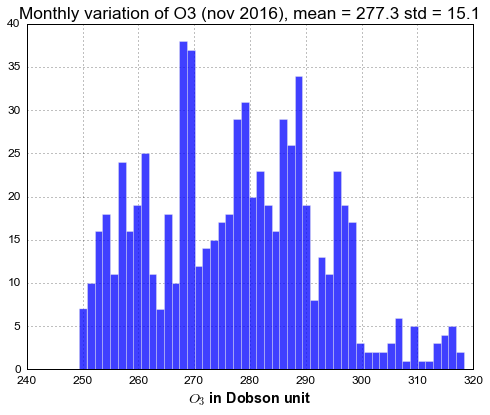

In [21]:
n, bins, patches = plt.hist(o3_month, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('$O_3$ in Dobson unit')
plt.savefig('HistoO32016_11.pdf')

In [22]:
o3_year=df_year["TO3"]

In [23]:
mean_O3_y = np.mean(o3_year)
variance_O3_y = np.var(o3_year)
sigma_O3_y = np.sqrt(variance_O3_y)

In [24]:
mean_O3_y=np.trunc(mean_O3_y*10)/10
sigma_O3_y=np.trunc(sigma_O3_y*10)/10

In [25]:
print mean_O3_y 
print variance_O3_y 
print sigma_O3_y 

267.5
247.789504719
15.7


In [26]:
title = "Yearly variation of O3 (year 2016), mean = {} std = {}".format(mean_O3_y ,sigma_O3_y)

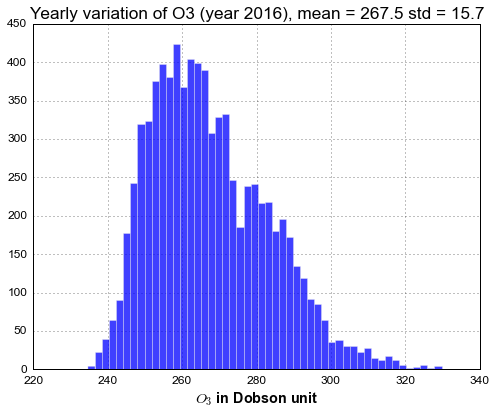

In [27]:
n, bins, patches = plt.hist(o3_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('$O_3$ in Dobson unit')
plt.savefig('HistoO32016_allyear.pdf')